## Clustering dataset to find penguin species
I will use the elbow method to find the optimal amount of clusters and later on i will use KMeans to cluster the data

I predict that this will work quite good and i am curious to find out how many different species there are in this dataset.

In [233]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('penguins.csv')

## Plotting ouliers

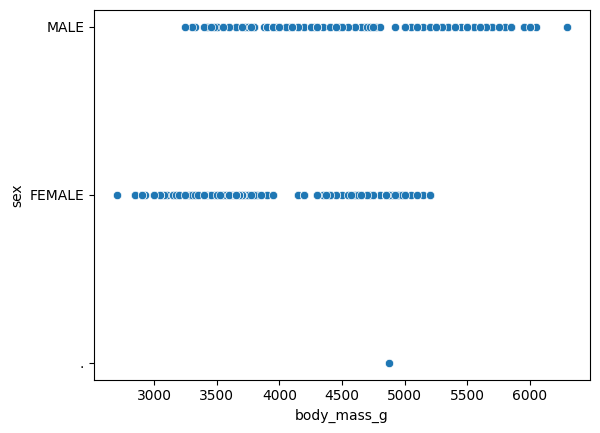

In [234]:
sns.scatterplot(data=data, x="body_mass_g", y="sex")
plt.show()

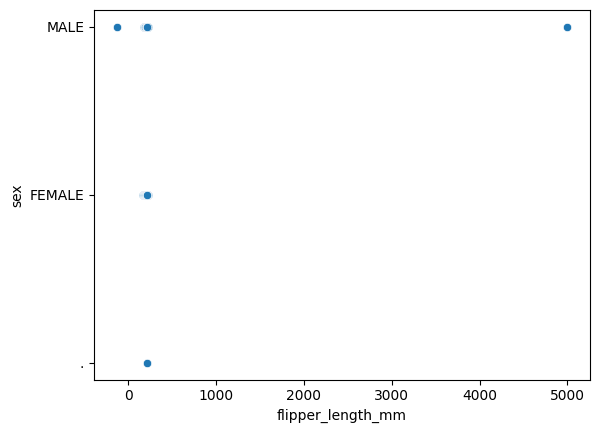

In [235]:
sns.scatterplot(data=data, x="flipper_length_mm", y="sex")
plt.show()

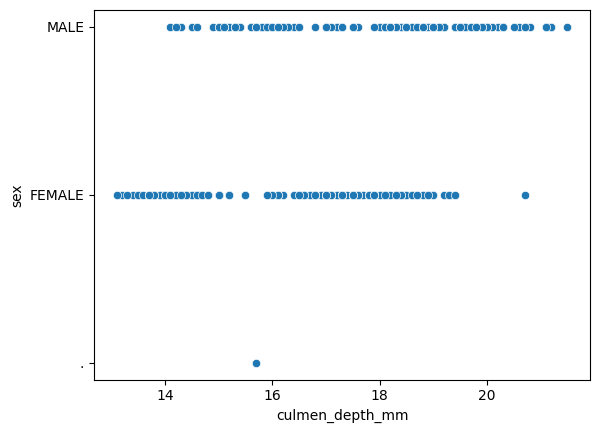

In [236]:
sns.scatterplot(data=data, x="culmen_depth_mm", y="sex")
plt.show()

## Cleaning the data

In [237]:
# Drop rows with missing values
data = data.dropna()

# Delete all rows where sex is NaN
data = data[data['sex'].isin(['MALE', 'FEMALE'])]

# Now, encode the 'sex' column to numerical values
data['sex'] = data['sex'].map({'MALE': 0, 'FEMALE': 1})

# Let's check the data
print(data.head())

print(data.isna().sum())


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1             18.7              181.0       3750.0    0
1              39.5             17.4              186.0       3800.0    1
2              40.3             18.0              195.0       3250.0    1
4              36.7             19.3              193.0       3450.0    1
5              39.3             20.6              190.0       3650.0    0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## Remove outliers

In [238]:
from scipy import stats

# Calculate Z-scores 
z_scores = stats.zscore(data)

# Define a threshold to identify an outlier
threshold = 3

# Identify outliers
outliers = np.where(np.abs(z_scores) > threshold)

# Remove outliers
data_without_outliers = data[(np.abs(z_scores) < threshold).all(axis=1)]

# Let's check the data
print(data_without_outliers.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
0              39.1             18.7              181.0       3750.0    0
1              39.5             17.4              186.0       3800.0    1
2              40.3             18.0              195.0       3250.0    1
4              36.7             19.3              193.0       3450.0    1
5              39.3             20.6              190.0       3650.0    0


## Use elbow method to get optimal amount of clusters

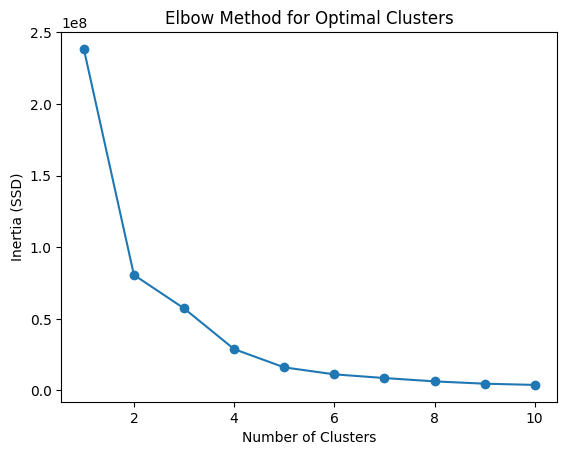

The optimal number of clusters is 2


In [239]:
num_clusters = range(1, 11)

# Fit KMeans for each cluster and store the inertia (SSD) in a list
inertia = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSD)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Calculate the second derivative of the inertia
diff = np.diff(inertia)
diff2 = np.diff(diff)

# Find the 'elbow' point
elbow = np.argmin(diff2) + 1  # +1 because the index starts from 0

print(f'The optimal number of clusters is {elbow}')


## Fitting a model

#### Short explanation of hyperparameters of kmeans
These hyperparameters are used to define the number of clusters to be formed (elbow), the initialization method (k-means++), the number of time the k-means algorithm will be run with different centroid seeds (n_init=10), the maximum number of iterations for a single run (max_iter=300), the relative tolerance with regards to inertia to declare convergence (tol=0.0001), the verbosity mode (verbose=0), and the seed used by the random number generator (random_state=0).

In [240]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Preprocess the categorical feature 'sex'
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

# Define the features
features = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

# Fit the KMeans model with the features
kmeans = KMeans(n_clusters=elbow, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=0)
kmeans.fit(features)

# Predict the labels of penguin species
labels = kmeans.predict(features)

## Tuning and evaluating

In [241]:
# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, labels)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.6211062705687461


## Plotting the clusters

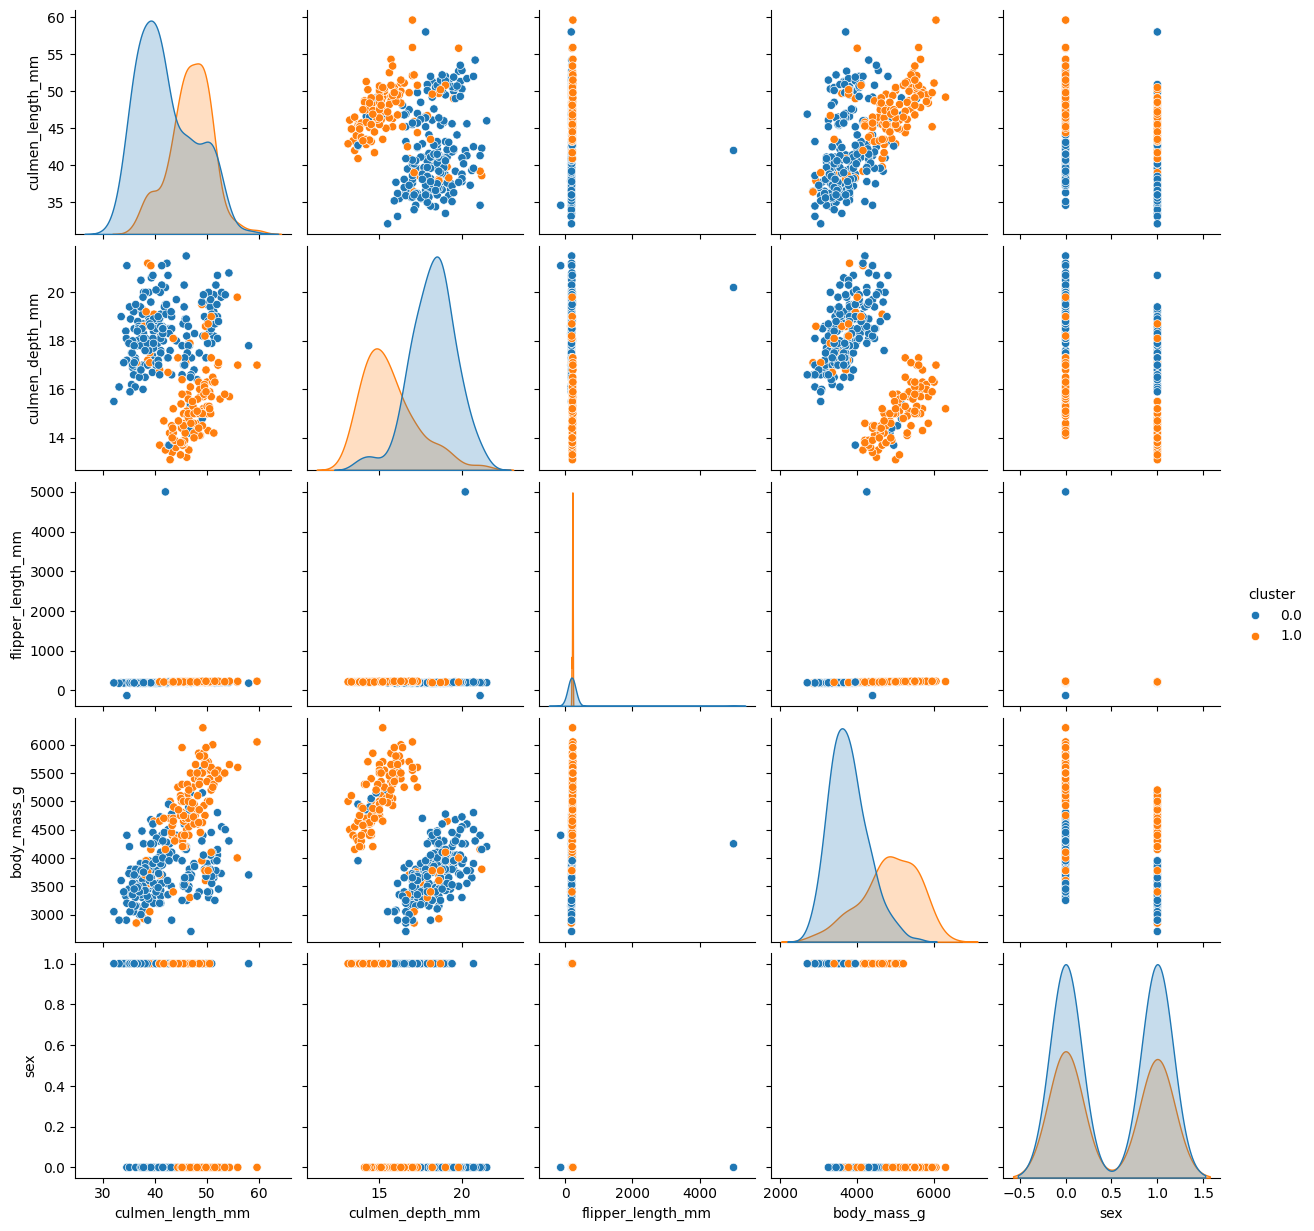

In [242]:
import seaborn as sns

# Convert the labels to a DataFrame
labels_df = pd.DataFrame(labels, columns=['cluster'])

# Concatenate the original DataFrame with the labels DataFrame
data_with_labels = pd.concat([data, labels_df], axis=1)

# Use pairplot function of seaborn
sns.pairplot(data_with_labels, hue='cluster', vars= features)
plt.show()

## Plotting clusters with centroids

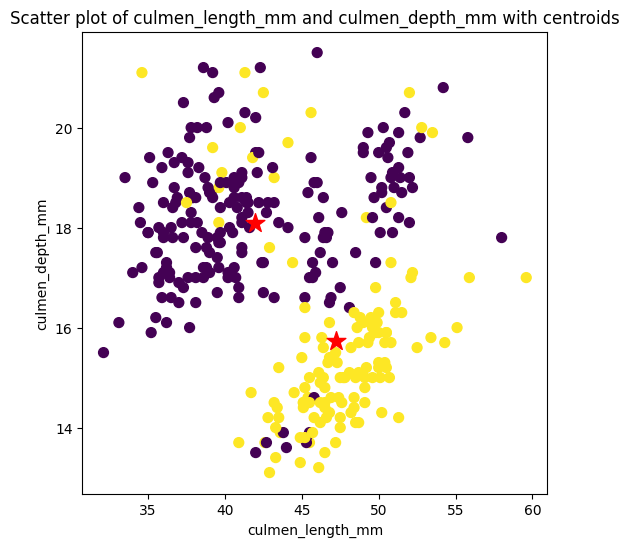

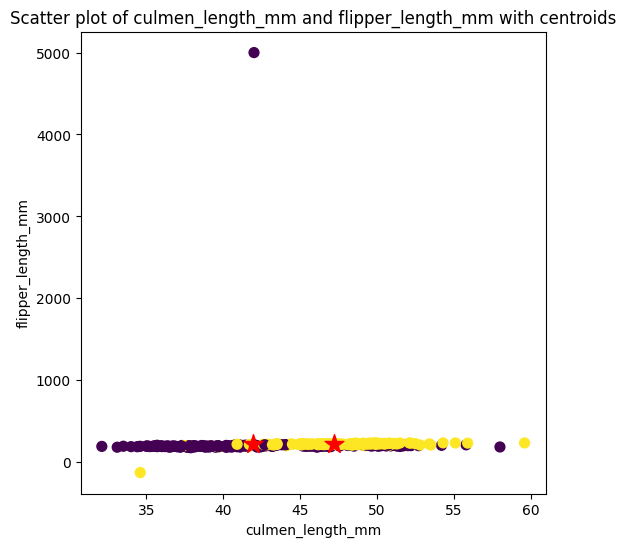

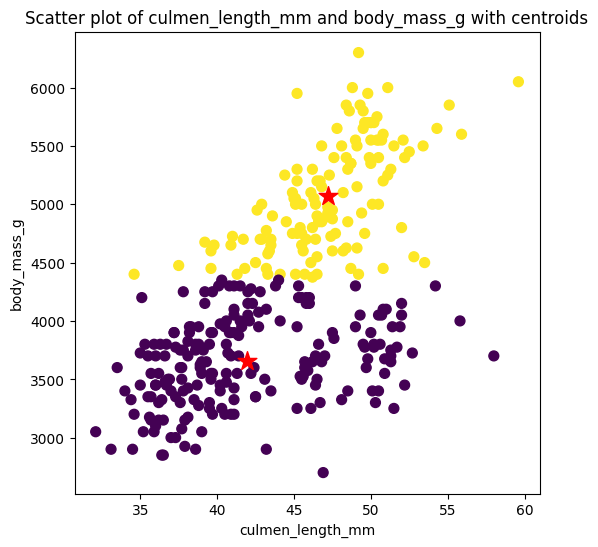

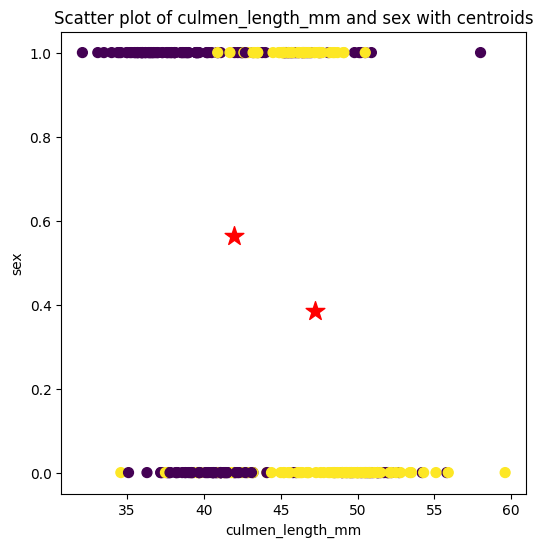

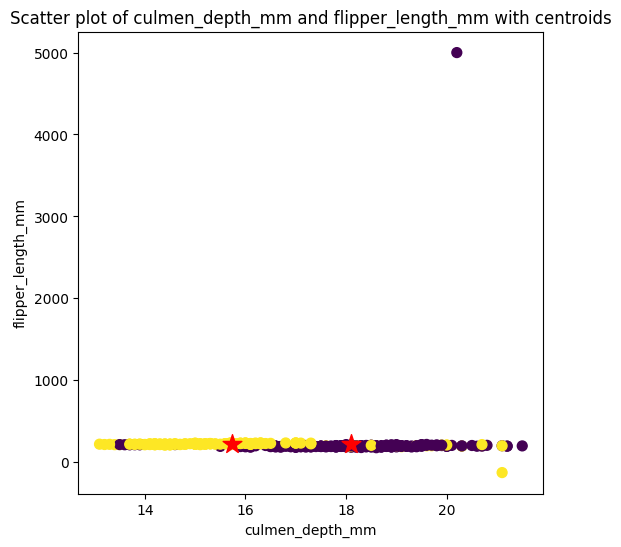

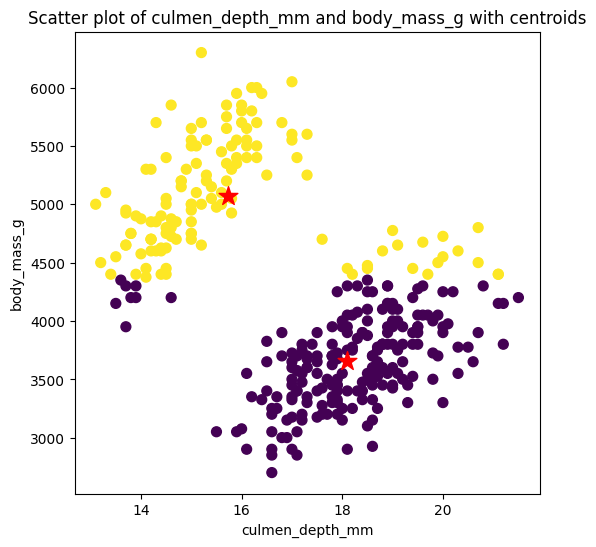

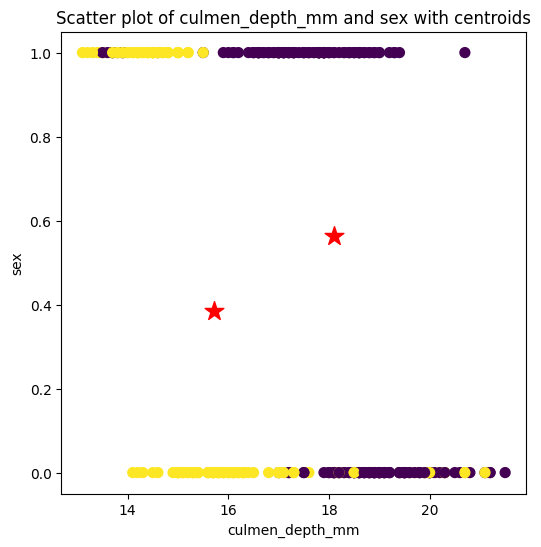

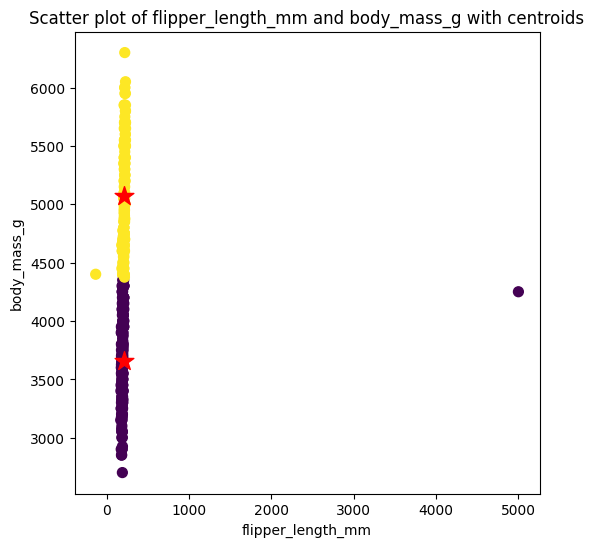

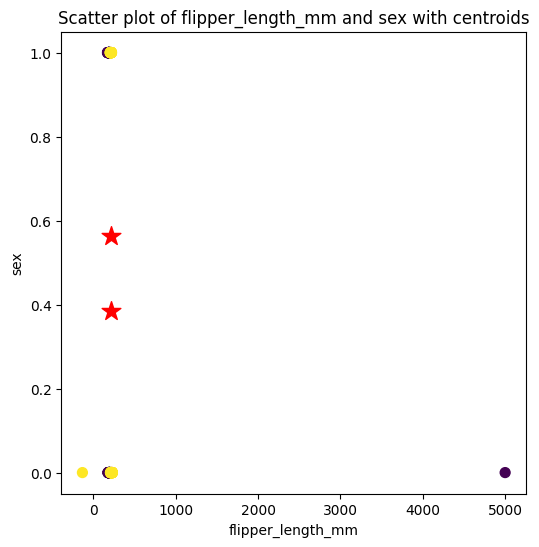

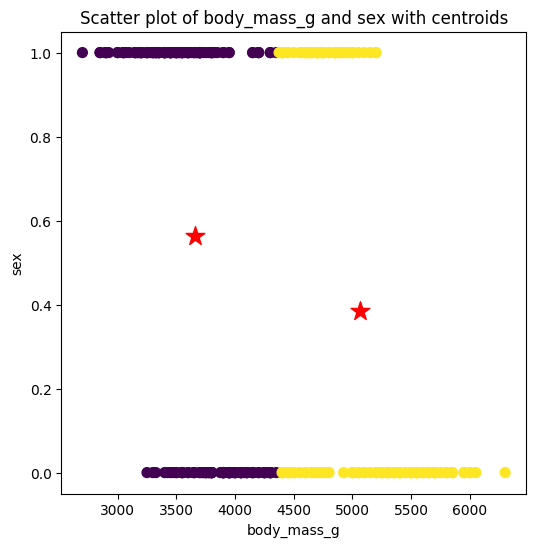

In [243]:
# Calculate the centroids
centroids = kmeans.cluster_centers_

# Define the features
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

# Create individual scatter plots for each pair of features
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(6, 6))
        plt.scatter(data[features[i]], data[features[j]], c=labels, s=50)
        plt.scatter(centroids[:, i], centroids[:, j], c='red', s=200, marker='*')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f"Scatter plot of {features[i]} and {features[j]} with centroids")
        plt.show()


## Conclusion
Kmeans and elbow method work well together, the clusters are spread quite well but some data points are in weird places, i have tried fine tuning the hyperparameters but came to the conclusion that was not the problem. These datapoints are probably outliers.